In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes_data.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Checking missing values if any!

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Correcting 0 values for SkinThickness
from sklearn.impute import SimpleImputer
missing_indices = np.where(df['SkinThickness'] == 0)[0]

In [10]:
skin_thickness = df['SkinThickness'].copy()
skin_thickness[missing_indices] = np.nan
imputer = SimpleImputer(strategy='mean')
imputed_skin_thickness = imputer.fit_transform(skin_thickness.values.reshape(-1, 1))

In [11]:
df['SkinThickness'] = imputed_skin_thickness.flatten()

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# For remaining features now
features_to_impute = ['Glucose', 'BloodPressure', 'Insulin', 'BMI']

for feature in features_to_impute:
    missing_indices = np.where(df[feature] == 0)[0]
    feature_values = df[feature].copy()
    feature_values[missing_indices] = np.nan

    imputer = SimpleImputer(strategy='mean')
    imputed_values = imputer.fit_transform(feature_values.values.reshape(-1, 1))

    df[feature] = imputed_values.flatten()

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

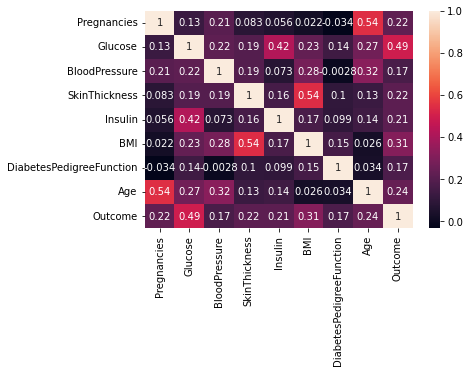

In [15]:
# Exploratory Data Analysis

## Correlation
import seaborn as sns
sns.heatmap(data=df.corr(), annot=True)

<AxesSubplot:>

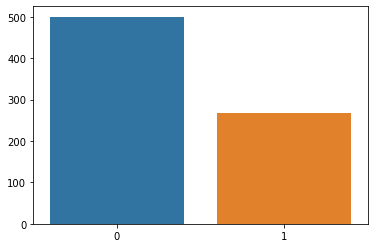

In [16]:
outcome_counts = df['Outcome'].value_counts()
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)

<AxesSubplot:title={'center':'Test'}>

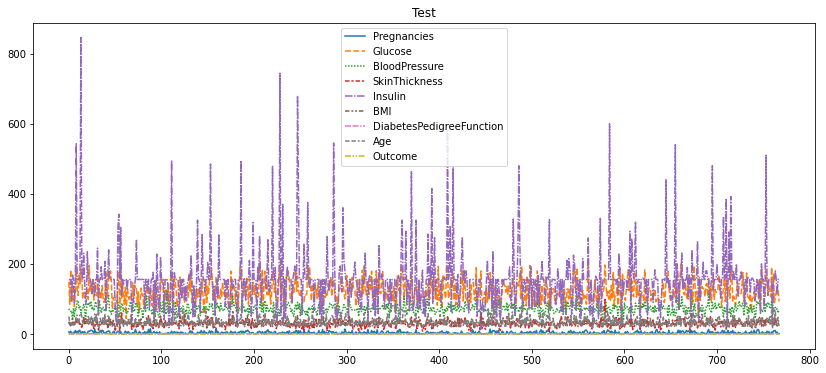

In [17]:
plt.figure(figsize=(14,6))
plt.title("Test")
sns.lineplot(data = df)

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

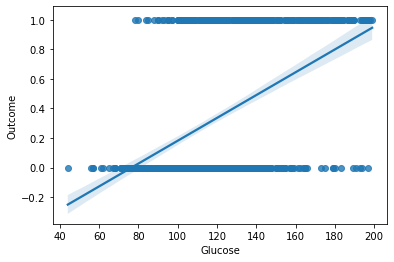

In [18]:
sns.regplot(x=df['Glucose'],y=df['Outcome'])

What I understand is that this problem statement must bot be solved using any Regression Technique
since it has a binary output

In [19]:
y = df.Outcome
df.drop(['Outcome'], axis=1, inplace=True)

In [20]:
#Train test split
from sklearn.model_selection import train_test_split
X_train_full, X_valid_full, y_train, y_valid = train_test_split(df,y,train_size=0.8,
                                                               test_size=0.2,
                                                               random_state=0)

In [21]:
X_train_full.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150.0,78.000000,29.00000,126.000000,35.2,0.692,54
118,4,97.0,60.000000,23.00000,155.548223,28.2,0.443,22
247,0,165.0,90.000000,33.00000,680.000000,52.3,0.427,23
157,1,109.0,56.000000,21.00000,135.000000,25.2,0.833,23
468,8,120.0,72.405184,29.15342,155.548223,30.0,0.183,38


Building a XGBClassifier Model

In [22]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_full, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [23]:
import sys
!{sys.executable} -m pip install xgboost

In [24]:
predictions_1 = model.predict(X_valid_full)

In [25]:
print(y.size)
print(y_valid.size)

768
154


In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, y_valid) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_1)

Mean Absolute Error: 0.19480519480519481


In [28]:
model2 = XGBClassifier(n_estimators=100, learning_rate = 0.05)
model2.fit(X_train_full,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
predictions_2 = model2.predict(X_valid_full)

In [30]:
mae_2 = mean_absolute_error(predictions_2, y_valid) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)

Mean Absolute Error: 0.18831168831168832


In [31]:
model3 = XGBClassifier(n_estimators=100, learning_rate = 0.05)
model3.fit(X_train_full,y_train)
predictions_3 = model3.predict(np.float32(X_valid_full))
mae_3 = mean_absolute_error(predictions_3, y_valid) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_3)

Mean Absolute Error: 0.18831168831168832


In [32]:
predictions_3

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Pickling the model file

In [33]:
import pickle

In [34]:
pickle.dump(model3, open('clmodel.pkl','wb'))